In [1]:
import numpy as np
import pandas as pd
import vaex
import seaborn as sns


In [23]:
## Tabular Data
data_dir = "/home/nikhil/projects/brain_changes/data/ukbb/"

tab_csv = f"{data_dir}tabular/ukb46307.csv"

follow_up_subjects = f"{data_dir}ukbb_follow_up_subjects.txt"

## Select few columns (cannot read entire CSV in memory)

In [53]:
column_codes = {
    "eid":"eid", 
    "31-0.0":"sex",
    "34-0.0":"birth_year",
    "21022-0.0": "age_at_recruitment",
    "21003-2.0": "age_at_ses2",
    "21003-3.0": "age_at_ses3",
    "21000-0.0":"ethnicity", 
    "20252-2.0":"T1-ses2",
    "20252-3.0":"T1-ses3"}

ukbb_tab_df = pd.read_csv(tab_csv, index_col=["eid"], usecols=column_codes.keys())

ukbb_tab_df = ukbb_tab_df.rename(columns=column_codes)

/home/nikhil/projects/green_comp_neuro/green_compute/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (11484,11485) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Cross-ref with currently available subjects from Neurohub

In [54]:
follow_up_subjects_list = list(np.hstack(pd.read_csv(follow_up_subjects,header=None).values))

# Make sure subjects have imaging data from ses2 and ses3
ukbb_tab_df = ukbb_tab_df[(~ukbb_tab_df["T1-ses2"].isna()) & (~ukbb_tab_df["T1-ses3"].isna())]

ukbb_tab_followup_df = ukbb_tab_df[ukbb_tab_df.index.isin(follow_up_subjects_list)]

print(f'Number of available follow up subjects: {len(ukbb_tab_followup_df)}')

ukbb_tab_followup_df.head()

Number of available follow up subjects: 1502


,sex,birth_year,T1-ses2,T1-ses3,ethnicity,age_at_ses2,age_at_ses3,age_at_recruitment
eid,,,,,,,,
1004084,1.0,1947.0,20252_2_0,20252_3_0,1001.0,70.0,72.0,60.0
1010063,0.0,1964.0,20252_2_0,20252_3_0,1001.0,53.0,55.0,45.0
1013774,1.0,1955.0,20252_2_0,20252_3_0,1001.0,62.0,64.0,54.0
1014782,1.0,1947.0,20252_2_0,20252_3_0,1001.0,70.0,72.0,61.0
1016215,1.0,1951.0,20252_2_0,20252_3_0,1001.0,65.0,67.0,56.0


## plots

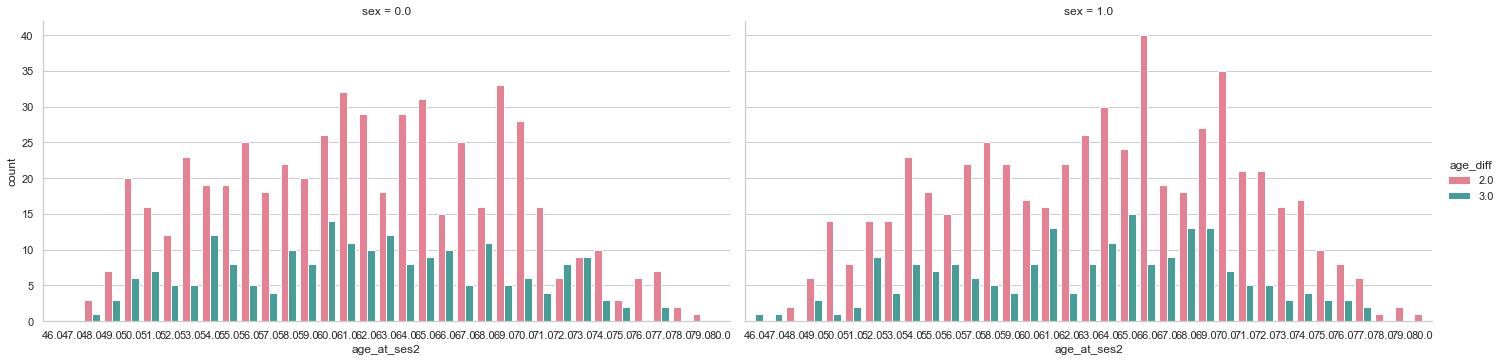

In [59]:
plot_df = ukbb_tab_followup_df.copy()
plot_df["age_diff"] = plot_df["age_at_ses3"] - plot_df["age_at_ses2"]
palette = 'husl'
sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="age_at_ses2", col='sex', hue="age_diff", kind='count',
    aspect=2, height=5, palette = palette, data=plot_df)
